## <span style="color:Blue">Importing Libraries

In [1]:
import pandas as pd
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt 
plt.style.use('seaborn')
import seaborn as sns

## <span style="color:Blue">Get Data

In [2]:
data = pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


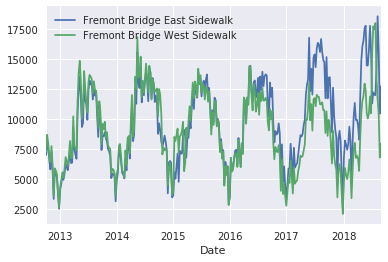

In [3]:
%matplotlib inline
data.resample('W').sum().plot()

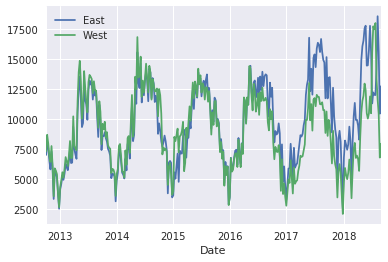

In [4]:
data.columns=['East','West']
data.resample('W').sum().plot()

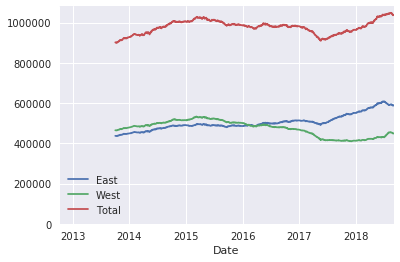

In [5]:
data['Total'] = data['West']+data['East']
ax=data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

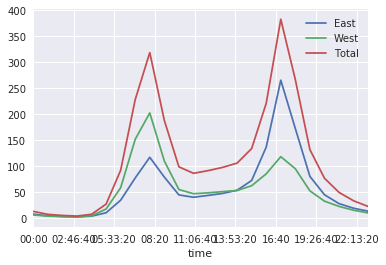

In [6]:
data.groupby(data.index.time).mean().plot()

In [7]:
pivoted = data.pivot_table('Total',index = data.index.time,columns = data.index.date)
pivoted.iloc[:5,:5]
pivoted.shape

(24, 2159)

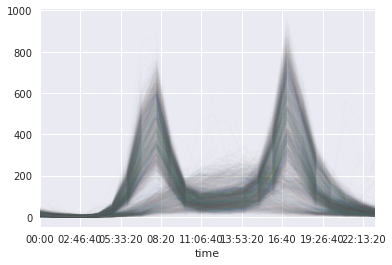

In [8]:
pivoted.plot(legend = False,alpha = 0.01)

## <span style="color:Blue">Prinicipal Component Analysis

In [9]:
X = pivoted.fillna(0).T.values
X.shape

(2159, 24)

In [10]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)
X2.shape

(2159, 2)

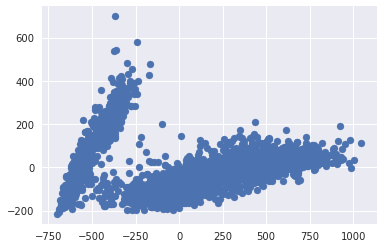

In [11]:
plt.scatter(X2[:, 0], X2[:, 1]);

## <span style="color:Blue">Unsupervised Clustering

In [12]:
gmm = GaussianMixture(2).fit(X)
labels = gmm.predict(X)

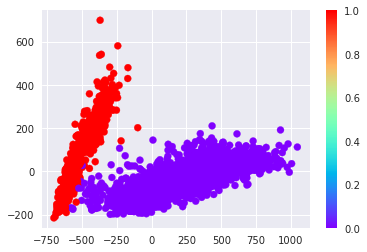

In [13]:
plt.scatter(X2[:, 0], X2[:, 1], c=labels, cmap='rainbow')
plt.colorbar();

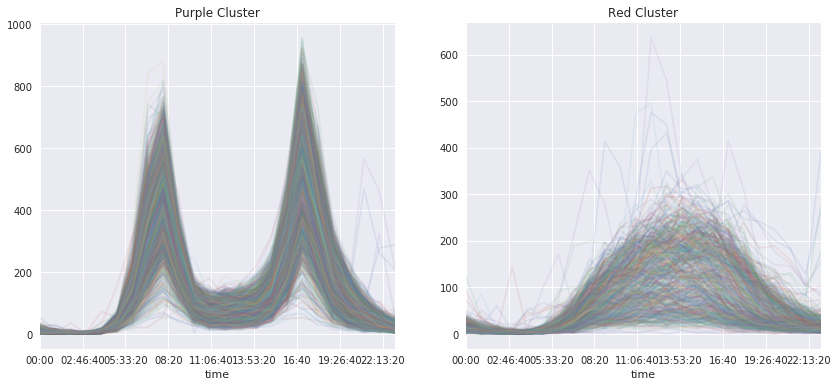

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

pivoted.T[labels == 0].T.plot(legend=False, alpha=0.1, ax=ax[0]);
pivoted.T[labels == 1].T.plot(legend=False, alpha=0.1, ax=ax[1]);

ax[0].set_title('Purple Cluster')
ax[1].set_title('Red Cluster');

## <span style="color:Blue">Comparing With Days Of Week

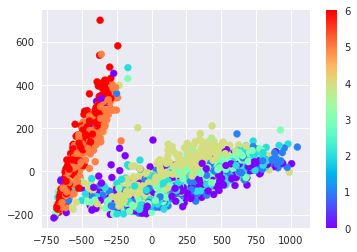

In [15]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek
plt.scatter(X2[:, 0], X2[:, 1], c=dayofweek, cmap='rainbow')
plt.colorbar();

## <span style="color:Blue">Analyzing Outliers

In [16]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels == 1) & (dayofweek < 5)]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-11-23', '2017-11-24', '2017-12-25', '2017-12-26',
               '2018-01-01', '2018-05-28', '2018-07-04'],
              dtype='datetime64[ns]', freq=None)